In [2]:
import pandas as pd
import os
from time import time, sleep
import seaborn as sns
import matplotlib.pyplot as plt
from requests import Session, ConnectionError, Timeout, TooManyRedirects
import json

In [3]:
 #Interact with the CoinMarketCap API to retrieve latest cryptocurrency listings.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '65693ab1-d4e3-401b-871f-944dbdbaf52a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [4]:
# Set pandas option to display all columns in DataFrame outputs
pd.set_option('display.max_columns',None)

In [5]:
# Normalize JSON data into a flat DataFrame
df = pd.json_normalize(data['data'])

In [6]:
# Add a timestamp column with the current datetime
df['timestamp'] = pd.to_datetime('now')

In [7]:
# Define a function to call the CoinMarketCap API and process the data
def api_runner():
    global df 
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '65693ab1-d4e3-401b-871f-944dbdbaf52a',
    }
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
 # Check if the CSV file exists; if not, create it with column names
    if not os.path.isfile(r'C:\Users\beaka\OneDrive\Desktop\pandas\API.csv'):
        df.to_csv(r'C:\Users\beaka\OneDrive\Desktop\pandas\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\beaka\OneDrive\Desktop\pandas\API.csv',mode='a',header=False)
        

In [7]:
# Run the API runner function every 12 hours (43200 seconds)  333 times maximum which is the limit 
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(43200)

API Runner completed


In [8]:
# Read the accumulated data from the CSV file
df1 = pd.read_csv('API.csv')
# Remove the unnamed column created during the CSV saving process
df1.drop(columns='Unnamed: 0', inplace=True)
df1

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11630,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.973736e+07,1.973736e+07,False,NaN,1,NaN,NaN,NaN,2024-08-09T00:03:00.000Z,61693.408114,4.526860e+10,8.9141,-1.163949,11.653642,-5.620468,6.351191,-11.396153,1.452852,1.217665e+12,56.4053,1.295562e+12,NaN,2024-08-09T00:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 20:04:51.725980
1,1027,Ethereum,ETH,ethereum,9201,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202612e+08,1.202612e+08,True,NaN,2,NaN,NaN,NaN,2024-08-09T00:02:00.000Z,2678.364016,2.342433e+10,-3.2486,-1.450431,14.195041,-16.344437,-12.651698,-27.710115,-7.930562,3.221034e+11,14.9206,3.221034e+11,NaN,2024-08-09T00:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 20:04:51.725980
2,825,Tether USDt,USDT,tether,93816,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.150179e+11,1.170681e+11,True,NaN,3,NaN,NaN,NaN,2024-08-09T00:02:00.000Z,1.000295,7.329838e+10,1.5113,0.011064,0.018014,0.113917,0.018245,0.044521,0.039852,1.150518e+11,5.3287,1.171026e+11,NaN,2024-08-09T00:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-08 20:04:51.725980
3,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.663404e+08,5.817975e+08,True,NaN,4,NaN,NaN,NaN,2024-08-09T00:02:00.000Z,162.752819,5.369874e+09,-2.5687,0.392386,12.366506,-2.789873,15.108547,0.408236,11.387721,7.589821e+10,3.5128,9.468919e+10,NaN,2024-08-09T00:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 20:04:51.725980
4,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459367e+08,1.459367e+08,False,NaN,5,NaN,NaN,NaN,2024-08-09T00:02:00.000Z,516.927667,1.788405e+09,-4.8242,-0.532584,8.896004,-10.119571,0.008667,-23.182137,-11.723574,7.543873e+10,3.4945,7.543873e+10,NaN,2024-08-09T00:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 20:04:51.725980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1958,TRON,TRX,tron,1009,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8.695408e+10,8.695413e+10,True,NaN,11,7.165966e+10,9.599629e+09,NaN,2024-08-18T13:21:00.000Z,0.133961,2.282134e+08,-35.6394,0.130927,-1.186858,4.390523,-0.478366,14.679880,9.844421,1.164849e+10,0.5501,1.164850e+10,NaN,2024-08-18T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-18 09:23:35.418915
146,5805,Avalanche,AVAX,avalanche,765,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.0,3.953610e+08,4.447014e+08,False,NaN,12,NaN,NaN,NaN,2024-08-18T13:21:00.000Z,21.217432,1.250746e+08,-19.4902,0.989402,3.423711,-1.365742,-21.036716,-22.600647,-40.772113,8.388545e+09,0.3960,1.518635e+10,NaN,2024-08-18T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-18 09:23:35.418915
147,5994,Shiba Inu,SHIB,shiba-inu,857,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,5.892704e+14,5.895191e+14,False,NaN,13,NaN,NaN,NaN,2024-08-18T13:21:00.000Z,0.000014,1.015196e+08,-20.8952,0.858573,1.447949,-2.486496,-21.259813,-26.199841,-43.438751,7.997797e+09,0.3778,8.001173e+09,NaN,2024-08-18T13:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0x95ad61b0a150

In [9]:
# Display settings for floating-point numbers
pd.set_option('display.float_format',lambda x: '%.5f' % x)
#perform summary stats for numerical columns
df1.describe()

,id,num_market_pairs,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,platform.id
count,150.00000,150.00000,50.00000,150.00000,150.00000,0.00000,150.00000,30.00000,30.00000,0.00000,150.00000,150.00000,150.00000,150.00000,150.00000,150.00000,150.00000,150.00000,150.00000,150.00000,150.00000,150.00000,0.00000,30.00000
mean,3220.33333,9844.71333,29151549743.80000,39316681235541.14844,39336551963967.92969,NaN,8.00000,25517937704.53790,12681695756.52371,NaN,4249.22788,8130610634.35050,6.68198,0.21361,1.02619,1.81313,-6.48478,-13.51660,-12.86344,127796013590.48788,6.05923,137604602071.45926,NaN,1027.00000
std,3129.27010,23280.12042,39837550012.52605,147473716620359.18750,147535078451664.12500,NaN,4.33497,33194610222.29107,6776336970.72387,NaN,14976.74480,15962323197.39021,39.16987,0.83756,4.24867,9.84357,12.06248,15.91025,16.06174,294068930259.62732,13.94164,311004274878.08734,NaN,0.00000
min,1.00000,498.00000,21000000.00000,19737365.00000,19737365.00000,NaN,1.00000,1478789514.55416,6584235656.80193,NaN,0.00001,68609560.41057,-57.36350,-3.88790,-8.10366,-16.40076,-29.01937,-40.17396,-45.20936,6529588092.60822,0.31120,6584235652.32000,NaN,1027.00000
25%,825.00000,798.00000,21000000.00000,145936670.36493,145936670.36493,NaN,4.00000,1480530158.09948,7086383869.14586,NaN,0.34578,257354334.75479,-18.83420,-0.20285,-1.25734,-4.64139,-15.59601,-26.24193,-27.60494,8525435348.48975,0.40430,11202337216.45500,NaN,1027.00000
50%,1958.00000,1034.00000,715748719.00000,2518483193.12152,5110361536.12848,NaN,8.00000,3414166606.00000,9137859630.52245,NaN,4.61406,771277271.18642,-4.13100,0.01778,0.01738,0.13179,-6.38225,-16.81063,-9.78152,16215170288.37082,0.76425,32903060088.42500,NaN,1027.00000
75%,5805.00000,9202.00000,45000000000.00000,86978265235.67310,99987342059.00000,NaN,12.00000,71659659264.00000,21384640494.23399,NaN,344.92444,5627006507.00317,27.47135,0.46139,2.74604,6.96510,0.00807,0.00870,0.03077,74143697849.35509,3.51135,85019849173.90500,NaN,1027.00000
max,11419.00000,94475.00000,100000000000.00000,589270406494933.50000,589519077523462.00000,NaN,15.00000,71659659264.00000,22867710403.69109,NaN,61693.40811,73298384933.63586,248.93790,3.46736,14.42801,33.15834,41.74661,23.90336,22.98940,1217665314042.37939,56.56620,1295561570396.55005,NaN,1027.00000


In [10]:
df2 = df1.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d',
'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08363,1.59353,2.25431,1.36708,-11.41220,-3.91401
Ethereum,0.18418,2.50504,-1.50835,-16.38303,-25.78105,-9.96943
Tether USDt,-0.00055,0.00940,0.05283,0.01470,0.06968,0.05619
Solana,0.52767,0.28120,4.25455,4.26097,-1.08244,0.77792
BNB,0.10605,1.29920,1.69253,-3.59619,-16.84610,-11.31285
XRP,0.22689,-1.26052,9.04440,19.97081,18.60817,14.45116
USDC,0.00245,0.01046,0.00084,-0.00114,0.00707,0.00466
Toncoin,0.24407,2.88474,8.38235,-11.84690,-12.97841,-5.37264
Dogecoin,0.32059,1.56076,1.92367,-5.66114,-25.62187,-28.94471


In [11]:
# Convert the grouped DataFrame into a stacked format
df3 = df2.stack()
type(df3)
df3

name                                      
Bitcoin       quote.USD.percent_change_1h      0.08363
              quote.USD.percent_change_24h     1.59353
              quote.USD.percent_change_7d      2.25431
              quote.USD.percent_change_30d     1.36708
              quote.USD.percent_change_60d   -11.41220
                                                ...   
Bitcoin Cash  quote.USD.percent_change_24h     2.24041
              quote.USD.percent_change_7d      0.92961
              quote.USD.percent_change_30d    -2.97228
              quote.USD.percent_change_60d   -21.64321
              quote.USD.percent_change_90d   -20.72117
Length: 90, dtype: float64

In [12]:
# Convert the stacked Series into a DataFrame
df4 = df3.to_frame()
df4 = df3.reset_index()
# Rename columns for clarity
df4.columns = ['Name','Percent Change Interval','Values']
df4

,Name,Percent Change Interval,Values
0,Bitcoin,quote.USD.percent_change_1h,0.08363
1,Bitcoin,quote.USD.percent_change_24h,1.59353
2,Bitcoin,quote.USD.percent_change_7d,2.25431
3,Bitcoin,quote.USD.percent_change_30d,1.36708
4,Bitcoin,quote.USD.percent_change_60d,-11.41220
...,...,...,...
85,Bitcoin Cash,quote.USD.percent_change_24h,2.24041
86,Bitcoin Cash,quote.USD.percent_change_7d,0.92961
87,Bitcoin Cash,quote.USD.percent_change_30d,-2.97228
88,Bitcoin Cash,quote.USD.percent_change_60d,-21.64321


In [13]:
# Replace long interval names with shorter ones
df4['Percent Change Interval']=df4['Percent Change Interval'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']
                                                                      ,['1h','24h','7d','30d','60d','90d'])
df4


,Name,Percent Change Interval,Values
0,Bitcoin,1h,0.08363
1,Bitcoin,24h,1.59353
2,Bitcoin,7d,2.25431
3,Bitcoin,30d,1.36708
4,Bitcoin,60d,-11.41220
...,...,...,...
85,Bitcoin Cash,24h,2.24041
86,Bitcoin Cash,7d,0.92961
87,Bitcoin Cash,30d,-2.97228
88,Bitcoin Cash,60d,-21.64321


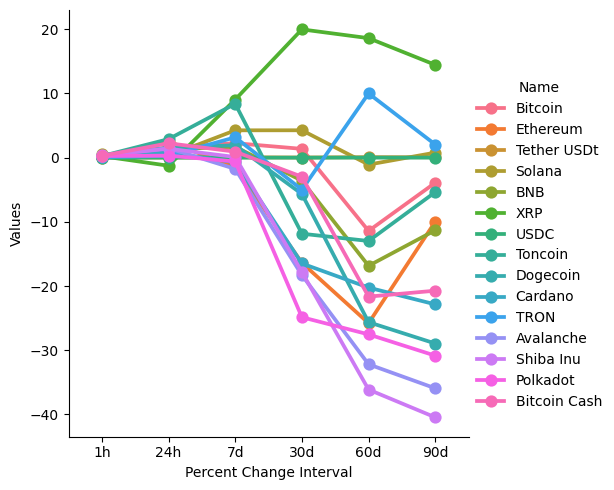

In [14]:
# Visualize percent change data using a point plot
sns.catplot(data=df4 , x='Percent Change Interval',y='Values',hue='Name',kind='point')

<Axes: xlabel='Values', ylabel='Density'>

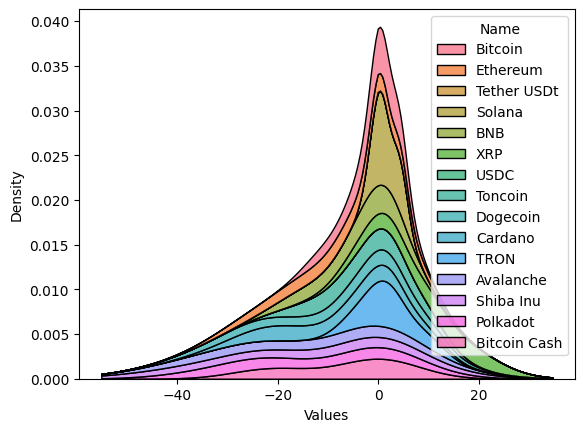

In [15]:
# Kernel Density Estimation plot to visualize distribution of values by name
sns.kdeplot(data=df4, x="Values", hue="Name", multiple="stack")

In [16]:
# Select specific columns related to price and timestamp
df5 = df1[['name','quote.USD.price','timestamp']]
# Convert 'timestamp' column to only include the date part (remove time component)
df5['timestamp']= df5['timestamp'].str.split().str[0]
# Extract the day from the 'timestamp' column
df5['day'] = df5['timestamp'].str.split('-').str[2]
df5


C:\Users\beaka\AppData\Local\Temp\ipykernel_25000\3636455826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['timestamp']= df5['timestamp'].str.split().str[0]
C:\Users\beaka\AppData\Local\Temp\ipykernel_25000\3636455826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['day'] = df5['timestamp'].str.split('-').str[2]


,name,quote.USD.price,timestamp,day
0,Bitcoin,61693.40811,2024-08-08,08
1,Ethereum,2678.36402,2024-08-08,08
2,Tether USDt,1.00029,2024-08-08,08
3,Solana,162.75282,2024-08-08,08
4,BNB,516.92767,2024-08-08,08
...,...,...,...,...
145,TRON,0.13396,2024-08-18,18
146,Avalanche,21.21743,2024-08-18,18
147,Shiba Inu,0.00001,2024-08-18,18
148,Bitcoin Cash,345.05786,2024-08-18,18


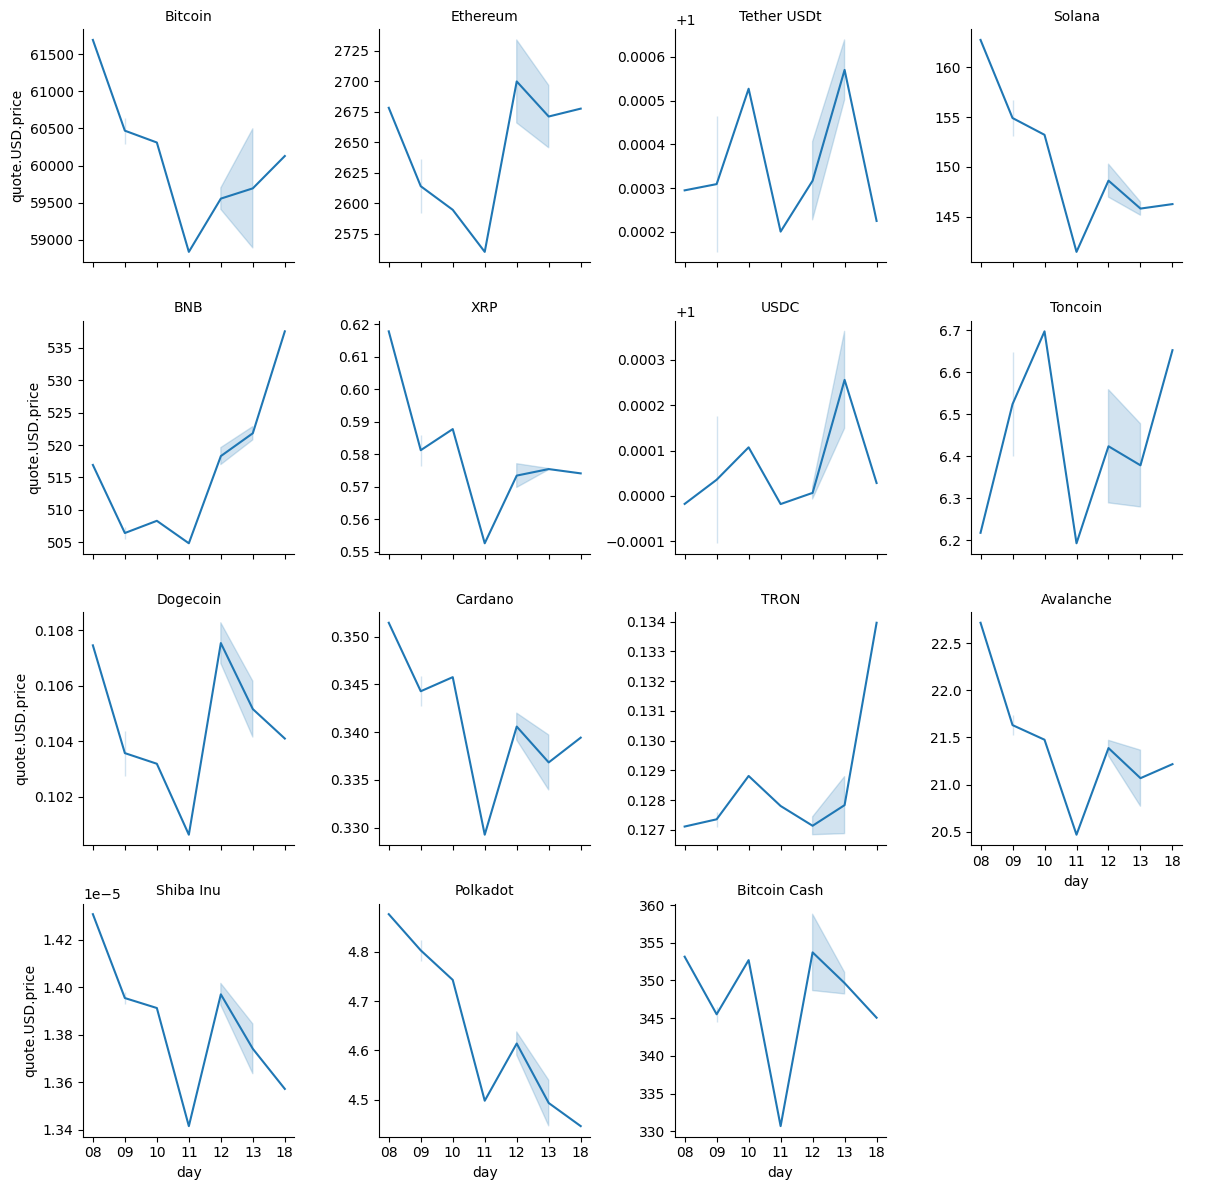

In [17]:
# Create a FacetGrid to plot separate line plots for each cryptocurrency
g = sns.FacetGrid(df5, col='name', col_wrap=4, sharex=True, sharey=False)
g.map(sns.lineplot, 'day', 'quote.USD.price')
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.show()

In [18]:
# Select columns related to circulating supply
c_supply = df1[['name','circulating_supply','timestamp']]
# Convert 'timestamp' column to only include the date part (remove time component)
c_supply['timestamp']= c_supply['timestamp'].str.split().str[0]
# Extract the day from the 'timestamp' column
c_supply['day'] = c_supply['timestamp'].str.split('-').str[2]
c_supply

C:\Users\beaka\AppData\Local\Temp\ipykernel_25000\271006739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_supply['timestamp']= c_supply['timestamp'].str.split().str[0]
C:\Users\beaka\AppData\Local\Temp\ipykernel_25000\271006739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_supply['day'] = c_supply['timestamp'].str.split('-').str[2]


,name,circulating_supply,timestamp,day
0,Bitcoin,19737365.00000,2024-08-08,08
1,Ethereum,120261233.89225,2024-08-08,08
2,Tether USDt,115017869041.69160,2024-08-08,08
3,Solana,466340396.82672,2024-08-08,08
4,BNB,145936720.87898,2024-08-08,08
...,...,...,...,...
145,TRON,86954081063.02136,2024-08-18,18
146,Avalanche,395361015.91431,2024-08-18,18
147,Shiba Inu,589270351540149.62500,2024-08-18,18
148,Bitcoin Cash,19748540.62500,2024-08-18,18


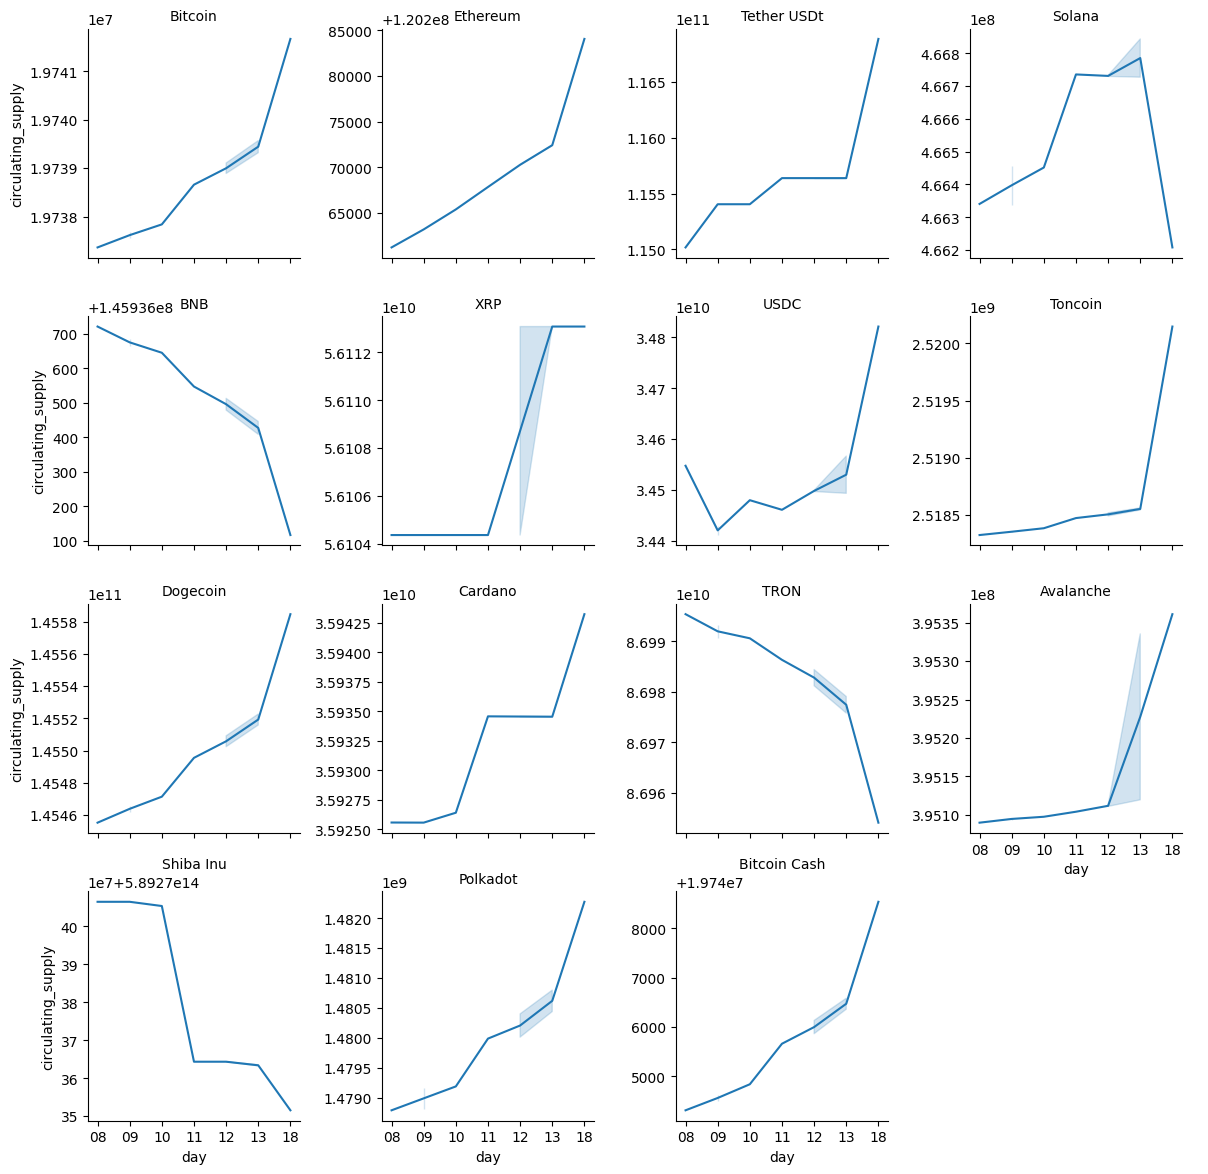

In [19]:
# Create a FacetGrid to plot separate line plots for each cryptocurrency
g = sns.FacetGrid(c_supply, col='name', col_wrap=4, sharex=True, sharey=False)
g.map(sns.lineplot, 'day', 'circulating_supply')
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.show()

In [20]:
# Group by cryptocurrency name and calculate the mean circulating supply
c_supply_plot = c_supply.groupby(['name'],sort=False)['circulating_supply'].mean()
c_supply_plot=c_supply_plot.to_frame()
# Sort the cryptocurrencies by their mean circulating supply and select the top 5
sorted = c_supply_plot.sort_values(by='circulating_supply')
sorted_values = sorted.head(5)

<Axes: xlabel='name', ylabel='circulating_supply'>

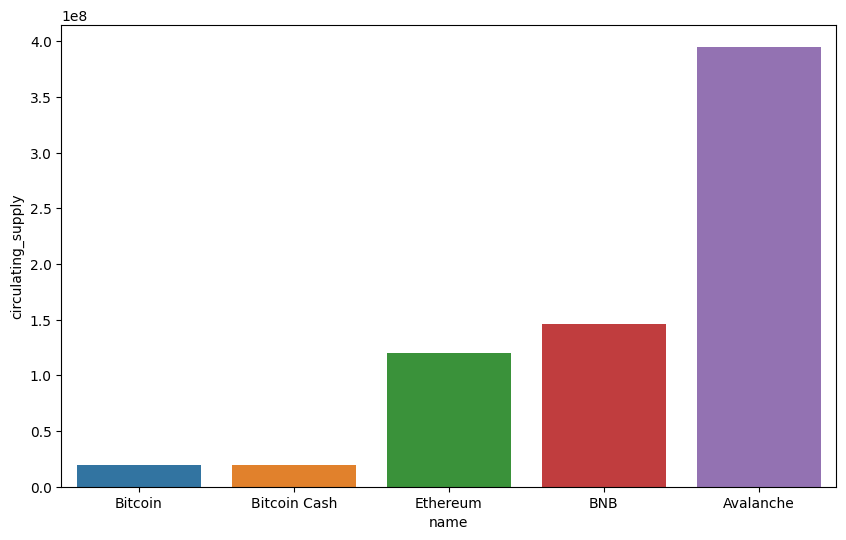

In [21]:
# Bar plot of the top 5 cryptocurrencies by circulating supply
plt.figure(figsize=(10,6))
sns.barplot(data=sorted_values,x='name',y='circulating_supply',hue='name')

In [22]:
# Check for missing values in the DataFrame
df1.isna().sum()

id                                      0
name                                    0
symbol                                  0
slug                                    0
num_market_pairs                        0
date_added                              0
tags                                    0
max_supply                            100
circulating_supply                      0
total_supply                            0
infinite_supply                         0
platform                              150
cmc_rank                                0
self_reported_circulating_supply      120
self_reported_market_cap              120
tvl_ratio                             150
last_updated                            0
quote.USD.price                         0
quote.USD.volume_24h                    0
quote.USD.volume_change_24h             0
quote.USD.percent_change_1h             0
quote.USD.percent_change_24h            0
quote.USD.percent_change_7d             0
quote.USD.percent_change_30d      

In [23]:
# Fill missing values in the max_supply column with 0
df1['max_supply'] = df1['max_supply'].fillna(0)
df1 = df1.drop('platform', axis = 1)

In [24]:
# Drop the 'platform' and 'tvl_ratio' columns as they are not needed
df1 = df1.drop('tvl_ratio', axis = 1)

Text(0.5, 1.0, 'Self reported Supply')

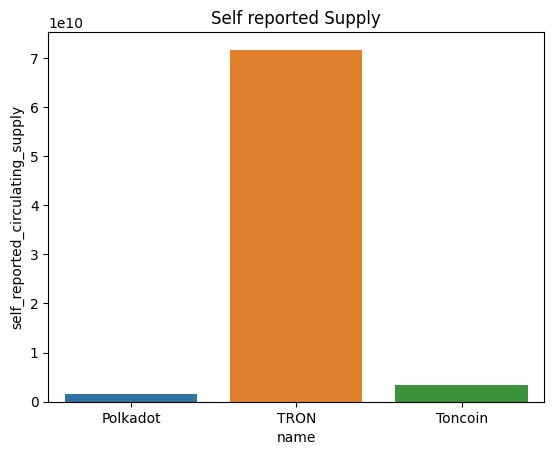

In [25]:
# Group by cryptocurrency name and calculate the mean of self-reported circulating supply
self_reported = df1.groupby('name')['self_reported_circulating_supply'].mean()
self_reported = self_reported.to_frame()
# Filter out rows where self-reported supply is missing
plot3 = self_reported[self_reported['self_reported_circulating_supply'].notna()]
# Bar plot of self-reported circulating supply for each cryptocurrency
sns.barplot(data=plot3, x ='name' , y = 'self_reported_circulating_supply',hue='name')
plt.title('Self reported Supply')